# Hledání nejkratší cesty v bludišti

## Textový popis

Tento projekt se zabývá řešením (hledáním nejkratší cesty) a také
základním generováním bludišť. Základním vstupem bude bludiště
$n\times n$, přičemž vstup do bludiště bude vždy levý horní roh a výstup
bude vždy pravý dolní roh. Z jedné buňky do druhé se lze dostat pouze
přes společnou hranu (nikoliv přes roh). Cílem projektu je implementovat
algoritmy pro načítání, hledání nejkratší cesty a generování bludiště.

Na začátku bude implementována funkce pro načítání bludiště z CSV
souboru. Tato funkce bude umět načítat bludiště o libovolném rozměru
$n\times n$ a uložit ho do paměti v podobě NumPy matice s True/False
hodnotami (True = buňka je neprůchozí). Poté bude implementován
algoritmus pro hledání nejkratší cesty. Poslední částí bude vytvoření
generátoru bludiště za použití algoritmu pro hledání nejkratší cesty.

Výstup bude formou obrázku (černá = neprostupná část, bílá = průchozí,
červená = nejkratší cesta).

## Funcionality

- Implementovat načítání bludiště z CSV souboru
- Implementovat algoritmus pro hledání nejkratší cesty (mezi levým horním rohem a pravým dolním rohem) za použití knihovny NumPy,který bude pracovat v následujících dvou krocích:
  - Sestavení incidenční matice
  - Hledání nejkratší cesty např. pomocí Dijkstrova algoritmu (jsou i jiné možnosti jako hledání do šířky, výběr je na vás)
- Zapsat bludiště a nalezenou cestu do černobílého obrázku, kde cesta bude vyznačena červeně
- Vytvořit funkci pro generování bludiště tak, aby mělo řešení (tj. aby existovala cesta mezi levým horním a pravým dolním rohem)
  - funkce začne s nějakou šablonou (předdefinované v kódu) a poté bude zaplňovat bludiště v náhodných místech a kontrolovat, zda je stále průchozí
  - šablon bude více (např. empty = volné bludiště, slalom = bariéry
    aby cesta musela minimálně mít tvar S, \...) - budou s obrázky ukázané v Readme nebo examples.ipynb

# Maze solver showcase

In [1]:
from maze_solver import Maze

## Solve

Initializing Maze object from a csv file and solving the maze.

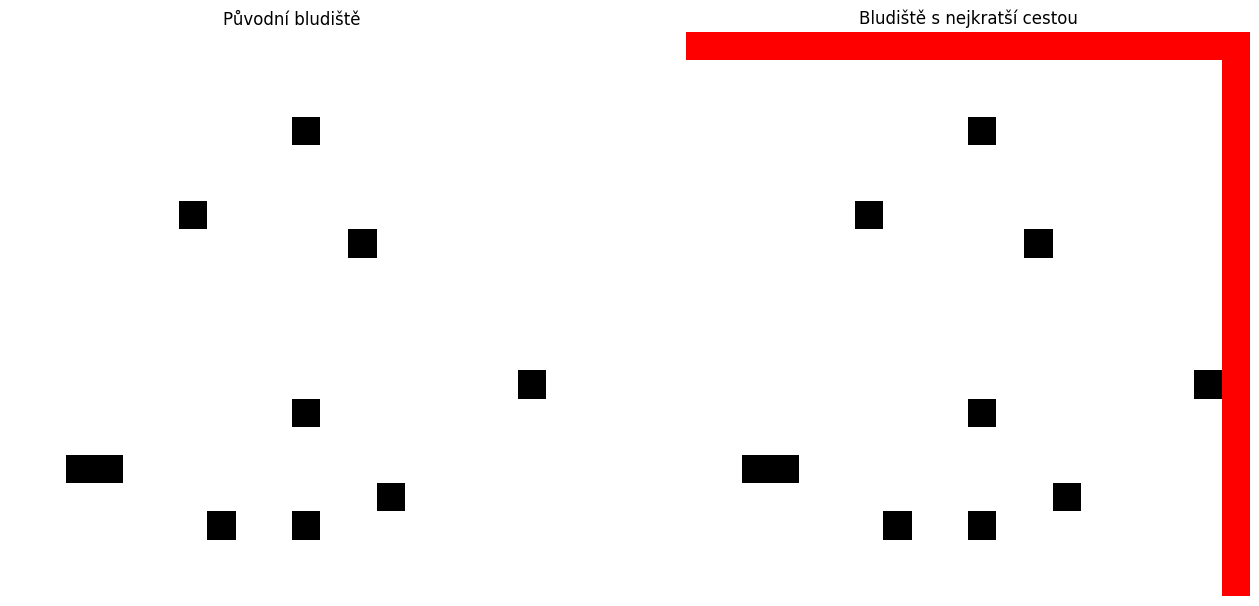

In [3]:
maze = Maze("data/maze_1.csv")
maze.solve()

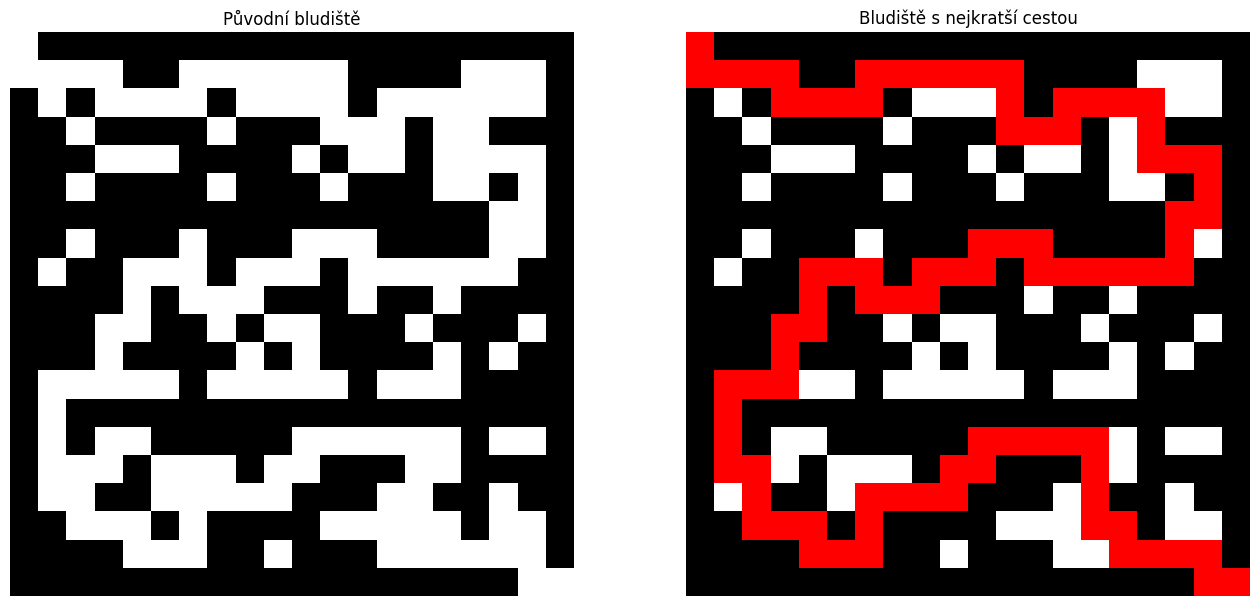

In [4]:
maze = Maze("data/maze_2.csv")
maze.solve()

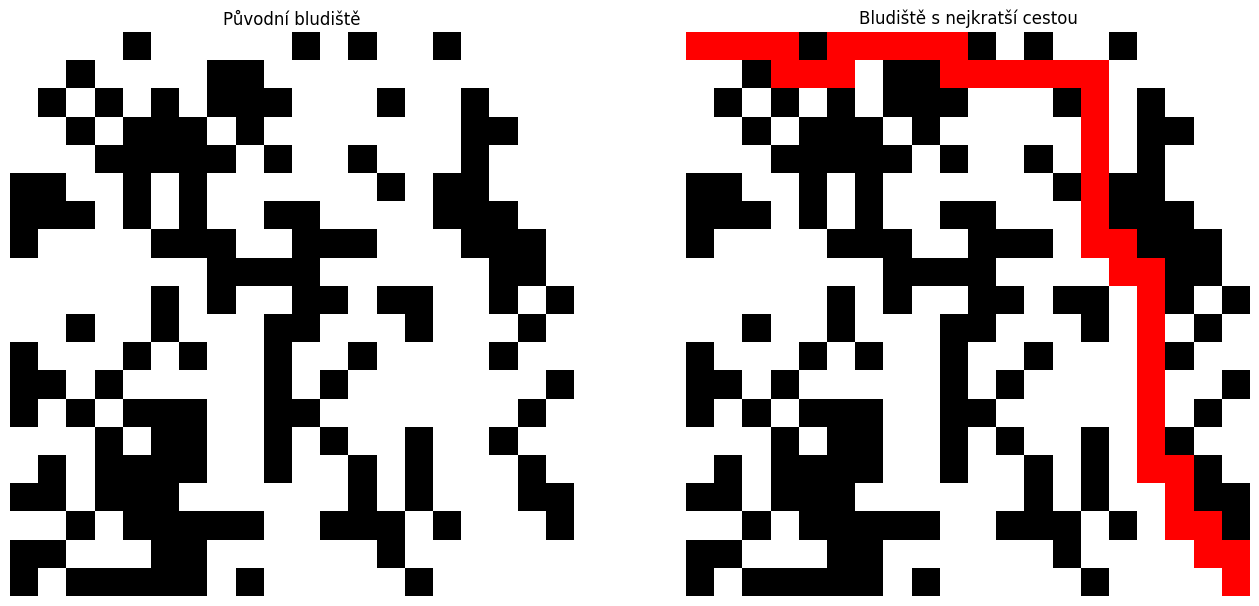

In [6]:
maze = Maze("data/maze_3.csv")
maze.solve()

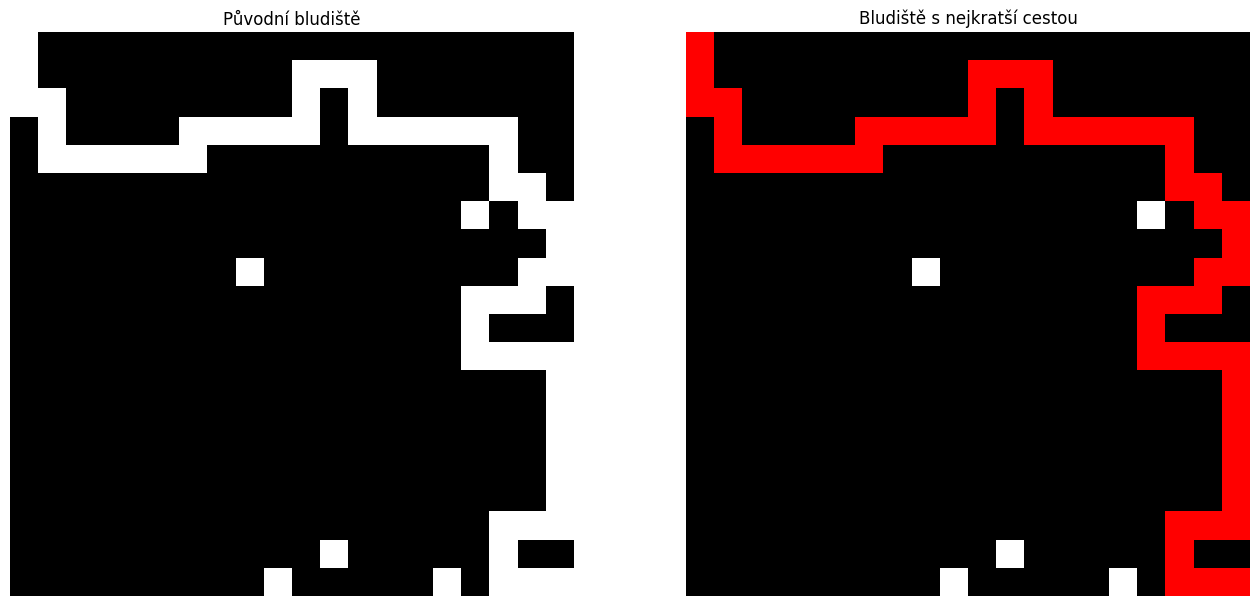

In [7]:
maze = Maze("data/maze_4.csv")
maze.solve()

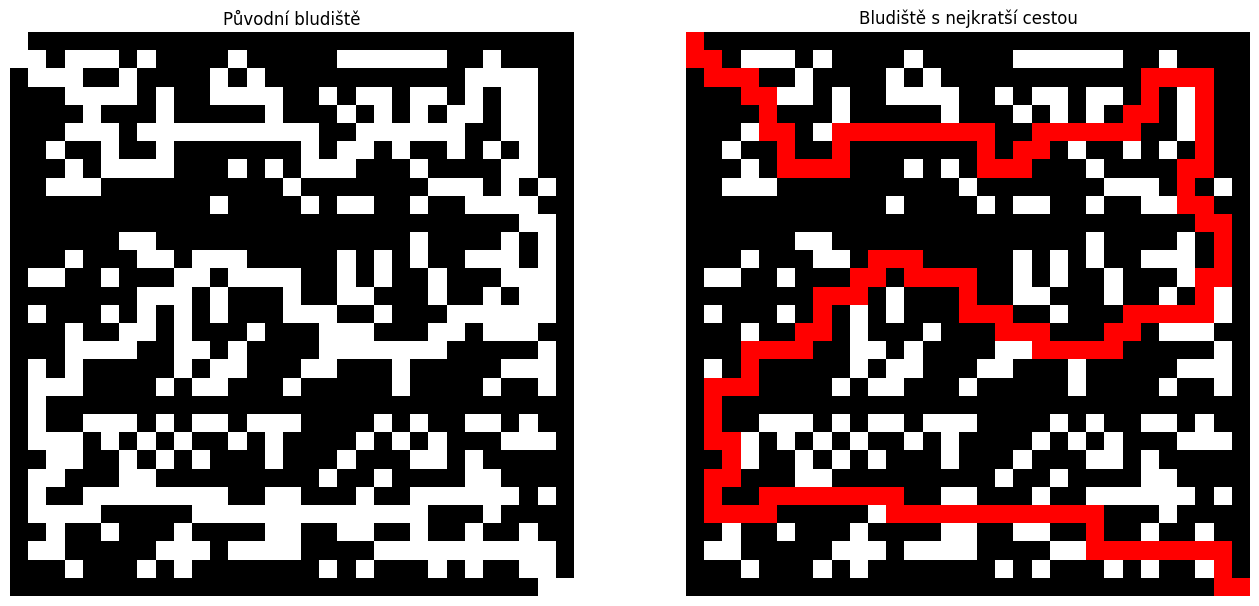

In [10]:
maze = Maze("data/maze_5.csv")
maze.solve()

In [2]:
import numpy as np

data = np.random.randint(0, 2, (50, 50))
maze6 = Maze(data)
maze6.solve()

Path does not exist.
